In [ ]:
import numpy as np
import pandas as pd
import torch
import scipy
from torch.utils.data import TensorDataset as TData
from torch.utils.data import DataLoader as DL
import matplotlib.pyplot as plt
import pickle
import os

import torch
import torch.nn as nn
import torch.optim as optim

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

root = '/content/drive/MyDrive/LHNT_pickles/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preprocessing**

In [ ]:
# Base folder containing the files
# right_session_folder = os.path.join(root, "alan_f_right/session_1")

# Initialize a dictionary to store the loaded signals
right_eeg_data = {}

# Iterate through files labeled in increments of two
for j in range(1, 5):
  right_session_folder = os.path.join(root, f"alan_f_right/session_{j}")
  for i in range(2, 21, 2):  # Adjust the range as needed
      file_path = os.path.join(right_session_folder, f"right_{i}.pkl")

      # Check if the file exists
      if os.path.exists(file_path):
          with open(file_path, "rb") as file:
              data = pickle.load(file)
              right_eeg_data[f"right_{j}_{i}"] = data  # Store the data with the corresponding label
      else:
          print(f"File not found: {file_path}")
          break  # Stop if the file sequence ends

# Print summary of loaded data
print(f"Loaded {len(right_eeg_data)} EEG signals.")
for label, signal in right_eeg_data.items():
    print(f"{label}: Type = {type(signal)}, Size = {len(signal) if hasattr(signal, '__len__') else 'N/A'}")


Loaded 40 EEG signals.
right_1_2: Type = <class 'tuple'>, Size = 2
right_1_4: Type = <class 'tuple'>, Size = 2
right_1_6: Type = <class 'tuple'>, Size = 2
right_1_8: Type = <class 'tuple'>, Size = 2
right_1_10: Type = <class 'tuple'>, Size = 2
right_1_12: Type = <class 'tuple'>, Size = 2
right_1_14: Type = <class 'tuple'>, Size = 2
right_1_16: Type = <class 'tuple'>, Size = 2
right_1_18: Type = <class 'tuple'>, Size = 2
right_1_20: Type = <class 'tuple'>, Size = 2
right_2_2: Type = <class 'tuple'>, Size = 2
right_2_4: Type = <class 'tuple'>, Size = 2
right_2_6: Type = <class 'tuple'>, Size = 2
right_2_8: Type = <class 'tuple'>, Size = 2
right_2_10: Type = <class 'tuple'>, Size = 2
right_2_12: Type = <class 'tuple'>, Size = 2
right_2_14: Type = <class 'tuple'>, Size = 2
right_2_16: Type = <class 'tuple'>, Size = 2
right_2_18: Type = <class 'tuple'>, Size = 2
right_2_20: Type = <class 'tuple'>, Size = 2
right_3_2: Type = <class 'tuple'>, Size = 2
right_3_4: Type = <class 'tuple'>, Size =

In [ ]:
# Base folder containing the files
# left_session_folder = os.path.join(root, "alan_f_left/session_1")

# Initialize a dictionary to store the loaded signals
left_eeg_data = {}

for j in range(1, 5):
  left_session_folder = os.path.join(root, f"alan_f_left/session_{j}")
  # Iterate through files labeled in increments of two
  for i in range(1, 20, 2):  # Adjust the range as needed
      file_path = os.path.join(left_session_folder, f"left_{i}.pkl")

      # Check if the file exists
      if os.path.exists(file_path):
          with open(file_path, "rb") as file:
              data = pickle.load(file)
              left_eeg_data[f"left_{j}_{i}"] = data  # Store the data with the corresponding label
      else:
          print(f"File not found: {file_path}")
          break  # Stop if the file sequence ends

# Print summary of loaded data
print(f"Loaded {len(left_eeg_data)} EEG signals.")
for label, signal in left_eeg_data.items():
    print(f"{label}: Type = {type(signal)}, Size = {len(signal) if hasattr(signal, '__len__') else 'N/A'}")


Loaded 40 EEG signals.
left_1_1: Type = <class 'tuple'>, Size = 2
left_1_3: Type = <class 'tuple'>, Size = 2
left_1_5: Type = <class 'tuple'>, Size = 2
left_1_7: Type = <class 'tuple'>, Size = 2
left_1_9: Type = <class 'tuple'>, Size = 2
left_1_11: Type = <class 'tuple'>, Size = 2
left_1_13: Type = <class 'tuple'>, Size = 2
left_1_15: Type = <class 'tuple'>, Size = 2
left_1_17: Type = <class 'tuple'>, Size = 2
left_1_19: Type = <class 'tuple'>, Size = 2
left_2_1: Type = <class 'tuple'>, Size = 2
left_2_3: Type = <class 'tuple'>, Size = 2
left_2_5: Type = <class 'tuple'>, Size = 2
left_2_7: Type = <class 'tuple'>, Size = 2
left_2_9: Type = <class 'tuple'>, Size = 2
left_2_11: Type = <class 'tuple'>, Size = 2
left_2_13: Type = <class 'tuple'>, Size = 2
left_2_15: Type = <class 'tuple'>, Size = 2
left_2_17: Type = <class 'tuple'>, Size = 2
left_2_19: Type = <class 'tuple'>, Size = 2
left_3_1: Type = <class 'tuple'>, Size = 2
left_3_3: Type = <class 'tuple'>, Size = 2
left_3_5: Type = <cla

In [ ]:
# Inspect the contents of one tuple
example_label = "left_1_1"
example_tuple = left_eeg_data[example_label]

print(f"{example_label} - Element 0: Type = {type(example_tuple[0])}, Content = {example_tuple[0]}")
print(f"{example_label} - Element 1: Type = {type(example_tuple[1])}, Content = {example_tuple[1]}")


left_1_1 - Element 0: Type = <class 'numpy.ndarray'>, Content = [[ 1.07494118e-01  1.16981031e-01  1.25534254e-01 ...  5.25463008e-10
   5.25463017e-10  5.25463008e-10]
 [ 6.37435343e+02  6.39591051e+02  6.61951532e+02 ...  2.03435023e+02
   2.01283768e+02  2.01690832e+02]
 [ 4.70954531e-01  7.39187233e+00  1.19185613e+01 ... -9.66871075e+00
  -8.48860013e+00 -1.08858048e+01]
 ...
 [ 1.07494118e-01  1.16981031e-01  1.25534254e-01 ...  5.25463008e-10
   5.25463017e-10  5.25463008e-10]
 [ 3.11900760e+02  3.02135437e+02  2.94692560e+02 ...  6.59457267e+01
   5.76878637e+01  5.75658806e+01]
 [ 7.94149748e+00  7.37285207e+00  8.81192056e+00 ... -7.29059665e+00
   5.85543683e+00  8.26233830e+00]]
left_1_1 - Element 1: Type = <class 'dict'>, Content = {'First Name': 'Alan', 'Last Name': 'Fletcher', 'EID': 'agf687', 'Stimulant Use': '0 mg', 'Meal Size': 'Medium meal', 'Meal Description': '2 4 inch pancakes', 'Exercised': 'no', 'Exercise Description': 'N/A'}


In [ ]:
right_signal_data = {label: signal[0] for label, signal in right_eeg_data.items()}
right_metadata = {label: signal[1] for label, signal in right_eeg_data.items()}

# Inspect extracted signal data and metadata
for label, signal in right_signal_data.items():
    print(f"{label}: Signal shape = {signal.shape}")


right_1_2: Signal shape = (16, 875)
right_1_4: Signal shape = (16, 875)
right_1_6: Signal shape = (16, 875)
right_1_8: Signal shape = (16, 875)
right_1_10: Signal shape = (16, 875)
right_1_12: Signal shape = (16, 875)
right_1_14: Signal shape = (16, 875)
right_1_16: Signal shape = (16, 875)
right_1_18: Signal shape = (16, 875)
right_1_20: Signal shape = (16, 875)
right_2_2: Signal shape = (16, 875)
right_2_4: Signal shape = (16, 875)
right_2_6: Signal shape = (16, 875)
right_2_8: Signal shape = (16, 875)
right_2_10: Signal shape = (16, 875)
right_2_12: Signal shape = (16, 875)
right_2_14: Signal shape = (16, 875)
right_2_16: Signal shape = (16, 875)
right_2_18: Signal shape = (16, 875)
right_2_20: Signal shape = (16, 875)
right_3_2: Signal shape = (16, 875)
right_3_4: Signal shape = (16, 875)
right_3_6: Signal shape = (16, 875)
right_3_8: Signal shape = (16, 875)
right_3_10: Signal shape = (16, 875)
right_3_12: Signal shape = (16, 875)
right_3_14: Signal shape = (16, 875)
right_3_16: S

In [ ]:
left_signal_data = {label: signal[0] for label, signal in left_eeg_data.items()}
metadata = {label: signal[1] for label, signal in left_eeg_data.items()}

# Inspect extracted signal data and metadata
for label, signal in left_signal_data.items():
    print(f"{label}: Signal shape = {signal.shape}")


left_1_1: Signal shape = (16, 875)
left_1_3: Signal shape = (16, 875)
left_1_5: Signal shape = (16, 875)
left_1_7: Signal shape = (16, 875)
left_1_9: Signal shape = (16, 875)
left_1_11: Signal shape = (16, 875)
left_1_13: Signal shape = (16, 875)
left_1_15: Signal shape = (16, 875)
left_1_17: Signal shape = (16, 875)
left_1_19: Signal shape = (16, 875)
left_2_1: Signal shape = (16, 875)
left_2_3: Signal shape = (16, 875)
left_2_5: Signal shape = (16, 875)
left_2_7: Signal shape = (16, 875)
left_2_9: Signal shape = (16, 875)
left_2_11: Signal shape = (16, 875)
left_2_13: Signal shape = (16, 875)
left_2_15: Signal shape = (16, 875)
left_2_17: Signal shape = (16, 875)
left_2_19: Signal shape = (16, 875)
left_3_1: Signal shape = (16, 875)
left_3_3: Signal shape = (16, 875)
left_3_5: Signal shape = (16, 875)
left_3_7: Signal shape = (16, 875)
left_3_9: Signal shape = (16, 875)
left_3_11: Signal shape = (16, 875)
left_3_13: Signal shape = (16, 875)
left_3_15: Signal shape = (16, 875)
left_3_

In [ ]:
plt.figure(figsize=(12, 60))

channel_subset = range(0, 16) # 16 channels total

for i, (label, signal) in enumerate(left_signal_data.items()):
    plt.subplot(len(left_signal_data), 1, i + 1)
    for j in channel_subset:  # Iterate through channels
        plt.plot(signal[j], label=f"Channel {j+1}" if i == 0 else None)  # Add legend only once
    plt.title(label)

plt.title("Left")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (μV)")
plt.tight_layout()

if len(left_signal_data) > 1:
    plt.legend()

plt.show()


In [ ]:
plt.figure(figsize=(12, 60))

channel_subset = range(0, 16) # 16 channels total

for i, (label, signal) in enumerate(right_signal_data.items()):
    plt.subplot(len(right_signal_data), 1, i + 1)
    for j in channel_subset:  # Iterate through channels
        plt.plot(signal[j], label=f"Channel {j+1}" if i == 0 else None)  # Add legend only once
    plt.title(label)

plt.title("Right")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (μV)")
plt.tight_layout()

if len(right_signal_data) > 1:
    plt.legend()

plt.show()


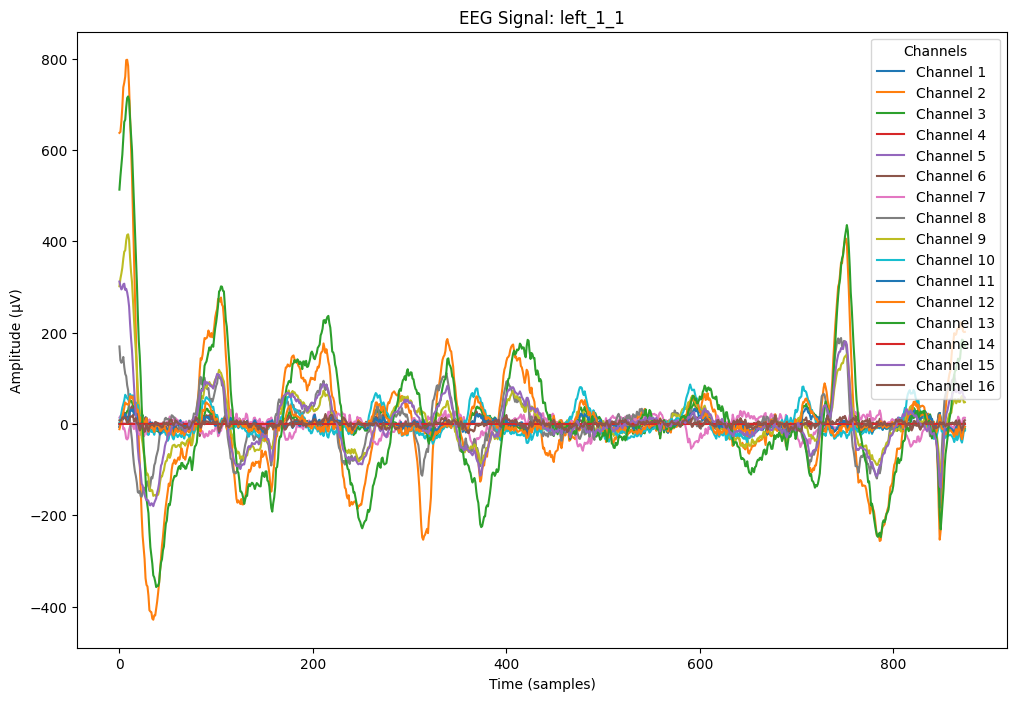

In [ ]:
import matplotlib.pyplot as plt

label = "left_1_1"  # Change this to the specific signal you want to visualize
signal = left_signal_data[label]

plt.figure(figsize=(12, 8))

# Plot each channel with a unique label
for i in range(signal.shape[0]):  # Iterate through channels
    plt.plot(signal[i], label=f"Channel {i+1}")  # Label each channel

plt.title(f"EEG Signal: {label}")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (μV)")
plt.legend(title="Channels")  # Add a legend with a title
plt.show()


In [ ]:
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import StandardScaler

def baseline_correction(signal):
    """
    Removes baseline offset by subtracting the mean of each channel.

    Parameters:
        signal (np.ndarray): EEG signal with shape (channels, samples).

    Returns:
        np.ndarray: Baseline-corrected signal.
    """
    return signal - np.mean(signal, axis=1, keepdims=True)


def bandpass_filter(signal, lowcut=13, highcut=30, fs=256, order=4):
    """
    Band-pass filters the signal for the specified frequency range.

    Parameters:
        signal (np.ndarray): EEG signal with shape (channels, samples).
        lowcut (float): Lower cutoff frequency (Hz).
        highcut (float): Upper cutoff frequency (Hz).
        fs (float): Sampling rate (Hz).
        order (int): Order of the filter.

    Returns:
        np.ndarray: Band-pass filtered signal.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return filtfilt(b, a, signal, axis=1)

def normalize_signal(signal):
    """
    Normalizes the signal for each channel (z-score normalization).

    Parameters:
        signal (np.ndarray): EEG signal with shape (channels, samples).

    Returns:
        np.ndarray: Normalized signal.
    """
    scaler = StandardScaler()
    return scaler.fit_transform(signal.T).T  # Transpose to normalize each channel

def preprocess_eeg(signal, fs=256):
    """
    Preprocess EEG signal with baseline correction, band-pass filtering, and normalization.

    Parameters:
        signal (np.ndarray): EEG signal with shape (channels, samples).
        fs (float): Sampling rate (Hz).

    Returns:
        np.ndarray: Preprocessed EEG signal.
    """
    # Step 1: Baseline Correction
    signal_corrected = baseline_correction(signal)

    # Step 2: Band-Pass Filter (Beta Frequencies)
    signal_filtered = bandpass_filter(signal_corrected, lowcut=4, highcut=40, fs=fs)

    # Step 3: Normalization
    signal_normalized = normalize_signal(signal_filtered)

    return signal_normalized


In [ ]:
# Preprocess each signal in the dictionary
right_preprocessed_signals = {label: preprocess_eeg(signal, fs=256) for label, signal in right_signal_data.items()}

# Inspect the shapes of the processed signals
for label, signal in right_preprocessed_signals.items():
    print(f"{label}: RIGHT Processed Signal Shape = {signal.shape}")


right_1_2: RIGHT Processed Signal Shape = (16, 875)
right_1_4: RIGHT Processed Signal Shape = (16, 875)
right_1_6: RIGHT Processed Signal Shape = (16, 875)
right_1_8: RIGHT Processed Signal Shape = (16, 875)
right_1_10: RIGHT Processed Signal Shape = (16, 875)
right_1_12: RIGHT Processed Signal Shape = (16, 875)
right_1_14: RIGHT Processed Signal Shape = (16, 875)
right_1_16: RIGHT Processed Signal Shape = (16, 875)
right_1_18: RIGHT Processed Signal Shape = (16, 875)
right_1_20: RIGHT Processed Signal Shape = (16, 875)
right_2_2: RIGHT Processed Signal Shape = (16, 875)
right_2_4: RIGHT Processed Signal Shape = (16, 875)
right_2_6: RIGHT Processed Signal Shape = (16, 875)
right_2_8: RIGHT Processed Signal Shape = (16, 875)
right_2_10: RIGHT Processed Signal Shape = (16, 875)
right_2_12: RIGHT Processed Signal Shape = (16, 875)
right_2_14: RIGHT Processed Signal Shape = (16, 875)
right_2_16: RIGHT Processed Signal Shape = (16, 875)
right_2_18: RIGHT Processed Signal Shape = (16, 875)
r

In [ ]:
# Preprocess each signal in the dictionary
left_preprocessed_signals = {label: preprocess_eeg(signal, fs=256) for label, signal in left_signal_data.items()}

# Inspect the shapes of the processed signals
for label, signal in left_preprocessed_signals.items():
    print(f"{label}: LEFT Processed Signal Shape = {signal.shape}")


left_1_1: LEFT Processed Signal Shape = (16, 875)
left_1_3: LEFT Processed Signal Shape = (16, 875)
left_1_5: LEFT Processed Signal Shape = (16, 875)
left_1_7: LEFT Processed Signal Shape = (16, 875)
left_1_9: LEFT Processed Signal Shape = (16, 875)
left_1_11: LEFT Processed Signal Shape = (16, 875)
left_1_13: LEFT Processed Signal Shape = (16, 875)
left_1_15: LEFT Processed Signal Shape = (16, 875)
left_1_17: LEFT Processed Signal Shape = (16, 875)
left_1_19: LEFT Processed Signal Shape = (16, 875)
left_2_1: LEFT Processed Signal Shape = (16, 875)
left_2_3: LEFT Processed Signal Shape = (16, 875)
left_2_5: LEFT Processed Signal Shape = (16, 875)
left_2_7: LEFT Processed Signal Shape = (16, 875)
left_2_9: LEFT Processed Signal Shape = (16, 875)
left_2_11: LEFT Processed Signal Shape = (16, 875)
left_2_13: LEFT Processed Signal Shape = (16, 875)
left_2_15: LEFT Processed Signal Shape = (16, 875)
left_2_17: LEFT Processed Signal Shape = (16, 875)
left_2_19: LEFT Processed Signal Shape = 

In [ ]:
import matplotlib.pyplot as plt

# Sort labels into left and right based on their numbering
left_labels = []
right_labels = []
for j in range(1, 5):
  for i in range(1, 20, 2):
    left_labels.append(f"left_{j}_{i}")
    right_labels.append(f"right_{j}_{i + 1}")

# Ensure the number of left and right labels match
assert len(left_labels) == len(right_labels), "Mismatch between left and right signals!"

# Compare left and right signals side by side
for left_label, right_label in zip(left_labels, right_labels):
    left_signal = left_preprocessed_signals[left_label]
    right_signal = right_preprocessed_signals[right_label]

    # Ensure the signals have the same number of channels for comparison
    assert left_signal.shape == right_signal.shape, f"Shape mismatch for {left_label} and {right_label}"

    num_channels = left_signal.shape[0]

    plt.figure(figsize=(16, num_channels * 3))
    plt.suptitle(f"Comparison of Left ({left_label}) vs Right ({right_label}) Signals", fontsize=16)

    for i in range(num_channels):
        # Left signal
        plt.subplot(num_channels, 2, i * 2 + 1)
        plt.plot(left_signal[i], label=f"Left Channel {i+1}", color='blue')
        plt.title(f"Left Signal - Channel {i+1}")
        plt.xlabel("Time (samples)")
        plt.ylabel("Amplitude (Normalized)")
        plt.legend()

        # Right signal
        plt.subplot(num_channels, 2, i * 2 + 2)
        plt.plot(right_signal[i], label=f"Right Channel {i+1}", color='red')
        plt.title(f"Right Signal - Channel {i+1}")
        plt.xlabel("Time (samples)")
        plt.ylabel("Amplitude (Normalized)")
        plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# **Data Loading**

In [ ]:
# Combine left and right signals into a single dataset with labels
X = []  # Feature data
y = []  # Labels

# Add left signals with label 0
for signal in left_preprocessed_signals.values():
    X.append(signal)  # Add the signal (channels x samples)
    y.append(0)  # Label for left signals

# Add right signals with label 1
for signal in right_preprocessed_signals.values():
    X.append(signal)
    y.append(1)  # Label for right signals

# Convert to NumPy arrays
X = np.array(X)  # Shape: (num_samples, num_channels, num_timepoints)
y = np.array(y)  # Shape: (num_samples,)
print(f"Combined dataset shape: X={X.shape}, y={y.shape}")


Combined dataset shape: X=(80, 16, 875), y=(80,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set: X_test={X_test.shape}, y_test={y_test.shape}")


Training set: X_train=(64, 16, 875), y_train=(64,)
Testing set: X_test=(16, 16, 875), y_test=(16,)


In [ ]:
X_train_eegnet = X_train[:, np.newaxis, :, :]  # Shape: (num_samples, 1, num_channels, num_timepoints)
X_test_eegnet = X_test[:, np.newaxis, :, :]

In [ ]:
import torch

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Shape: (num_samples, num_channels, num_timepoints)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)    # Shape: (num_samples,)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print(f"Training tensors: X_train_tensor={X_train_tensor.shape}, y_train_tensor={y_train_tensor.shape}")
print(f"Testing tensors: X_test_tensor={X_test_tensor.shape}, y_test_tensor={y_test_tensor.shape}")


Training tensors: X_train_tensor=torch.Size([64, 16, 875]), y_train_tensor=torch.Size([64])
Testing tensors: X_test_tensor=torch.Size([16, 16, 875]), y_test_tensor=torch.Size([16])


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Combine tensors into a TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Adjust batch_size as needed
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


#  TCN Model

In [ ]:
# prompt: Given the data make a TCN model that efficiently processes the data, does signal processing, does partitioning Dataset and Creating Data Loaders
# And separable-conv model and efficiently trains the model and evaluates the mod
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

import pandas as pd

# Hyperparameters
input_size = 80
output_size = 2
num_channels = [20, 20]
kernel_size = 3
dropout = 0.2
learning_rate = 0.001
batch_size = 32
num_epochs = 10
num_channels_in_data = 16



# 3. TCN Model
class TCN(nn.Module):
  def __init__(self, in_channels, n_classes):
    super().__init__()
    self.convblock1 = torch.nn.Sequential(torch.nn.Conv1d(in_channels, in_channels, kernel_size = 3, groups = 1), # depthwise convolution
                                           torch.nn.Conv1d(in_channels, 32, kernel_size=1), # pointwise convolution
                                           torch.nn.BatchNorm1d(32),
                                           torch.nn.ReLU())
    # optional convblock can be uncommented by input channels to linear layer must be updated
    # self.convblock2 = torch.nn.Sequential(torch.nn.Conv1d(32, 32, kernel_size=3, stride = 2, groups = 32), # depthwise convolution
    #                                        torch.nn.Conv1d(32, 64, kernel_size=1), # pointwise convolution
    #                                        torch.nn.BatchNorm1d(64),
    #                                        torch.nn.ReLU())
    self.flatten = torch.nn.Flatten()
    self.dropout = torch.nn.Dropout(0.5)
    signal_length = 875
    output_size = 32 * (signal_length - kernel_size + 1)  # Output size after convblock1 and before flatten

    # Adjust the input size of the linear layer to match the output size of the convolutional layers
    self.dense = torch.nn.Linear(output_size, n_classes)

  def forward(self, x):
    # pass data through both separable conv block
    y = self.convblock1(x)
    # y = self.convblock2(y)
    # flatten data

    y = self.flatten(y)

    # dropout regularization to help mitigate overfitting
    y = self.dropout(y)
    # pass through final linear layer
    y = self.dense(y)
    return y

convNet = TCN(num_channels_in_data, 2).to(device)

##### Model Training

from tqdm.auto import tqdm
# using cross_entropy_loss
criterion = torch.nn.CrossEntropyLoss()
# using SGD optimizer for optimal convergence, even if slower
optimizer = torch.optim.SGD(convNet.parameters(), lr = 0.009, momentum = 0.9, weight_decay=5e-3)
epochs = 8

train_losses = []
val_losses = []
accs = []
max_acc = 0
for i in range(epochs):
  total_train_loss = 0.0
  # set model to training mode
  convNet.train()
  # create progress bar
  pbar = tqdm(total=len(train_loader))
  for j, (sig, labels) in tqdm(enumerate(train_loader)):
    # add signal and label to cuda device
    sig = sig.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    # forward pass

    pred = convNet(sig)
    # loss evaluation
    loss = criterion(pred, labels)
    # backpropagation
    loss.backward()
    optimizer.step()

    total_train_loss += loss.item()
    # update progress bar with running loss
    pbar.set_description(f"Epoch {i + 1}    loss={total_train_loss / (j + 1):0.4f}")
    pbar.update(1)
  pbar.close()
  train_losses.append(total_train_loss / len(train_loader))

  total_val_loss = 0.0
  total_accuracy = 0.0
  # set model to evaluation mode, which changes the behavior
  # of some layers like dropout and batch normalization
  convNet.eval()
  with torch.no_grad():
      # create progress bar
      pbar = tqdm(total=len(test_loader))
      for j, (sig, labels) in enumerate(test_loader):
          # send signal and label to cuda device
          sig = sig.to(device)
          labels = labels.to(device)
          # make prediction and evaluate loss
          pred = convNet(sig)
          loss = criterion(pred, labels)

          # perform softmax on output which is usually performed by loss automatically
          # this gives a probability vector
          prob_pred = torch.nn.functional.softmax(pred, -1)
          # compute accuracies by
          # 1. getting index of highest number (highest probability prediction)
          # 2. comparing the tensors element wise which gives boolean array comparing predictions to ground truth
          # 3. converting boolean array into array of 0s and 1s
          # 4. calculating mean with binary array, which gives (correct predictions) / (total predictions)
          acc = (prob_pred.argmax(-1) == labels.argmax(-1)).float().mean()
          total_val_loss += loss.item()
          total_accuracy += acc.item()

          # update progress bar with val loss and accuracy
          pbar.set_description(f"val loss={total_val_loss / (j + 1):.4f}    val acc={total_accuracy / (j + 1):.4f}")
          pbar.update(1)
      print()
      pbar.close()
      val_losses.append(total_val_loss / len(test_loader))
      accs.append(total_accuracy / len(test_loader))

  # save model if accuracy is best seen
  if accs[-1] > max_acc:
    # dictionary with model state dict, optimizer state dict, and best accuracy
    checkpoint = {'state_dict': convNet.state_dict(), 'optimizer': optimizer.state_dict(), 'best_acc': accs[-1]}
    # save dictionary to specified file path if it exists or create new one otherwise
    torch.save(checkpoint, 'SepConv2.pth.tar')
    print('Model Saved')
    max_acc = accs[-1]

NameError: name 'train_loader' is not defined

In [ ]:
convNet = TCN(num_channels_in_data, 2).to(device)

# **Initial model training** (mainly to see if data is loaded properly)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the 1D CNN model
class Simple1DCNN(nn.Module):
    def __init__(self, num_channels, num_classes):
        super(Simple1DCNN, self).__init__()
        self.conv1 = nn.Conv1d(num_channels, 16, kernel_size=3, stride=1, padding=1)  # Conv layer
        self.bn1 = nn.BatchNorm1d(16)  # Batch normalization
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc = nn.Linear(32, num_classes)  # Fully connected layer for classification

    def forward(self, x):
        # Input shape: (batch_size, num_channels, num_timepoints)
        x = self.conv1(x)  # Conv layer 1
        x = self.bn1(x)  # Batch normalization
        x = self.relu(x)  # Activation
        x = self.conv2(x)  # Conv layer 2
        x = self.bn2(x)  # Batch normalization
        x = self.relu(x)  # Activation
        x = x.mean(dim=2)  # Global average pooling over the time dimension
        x = self.fc(x)  # Fully connected layer
        return x

# Instantiate the model
num_channels = X_train_tensor.shape[1]  # Number of EEG channels
num_classes = 2  # Binary classification (left vs right)
model = Simple1DCNN(num_channels=num_channels, num_classes=num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Simple1DCNN(
  (conv1): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=32, out_features=2, bias=True)
)

In [ ]:
# Training loop
num_epochs = 100

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Move inputs and targets to GPU if available
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/100], Loss: 0.6985
Epoch [2/100], Loss: 0.6929
Epoch [3/100], Loss: 0.6903
Epoch [4/100], Loss: 0.6876
Epoch [5/100], Loss: 0.6848
Epoch [6/100], Loss: 0.6832
Epoch [7/100], Loss: 0.6821
Epoch [8/100], Loss: 0.6809
Epoch [9/100], Loss: 0.6790
Epoch [10/100], Loss: 0.6779
Epoch [11/100], Loss: 0.6759
Epoch [12/100], Loss: 0.6757
Epoch [13/100], Loss: 0.6729
Epoch [14/100], Loss: 0.6732
Epoch [15/100], Loss: 0.6702
Epoch [16/100], Loss: 0.6675
Epoch [17/100], Loss: 0.6667
Epoch [18/100], Loss: 0.6644
Epoch [19/100], Loss: 0.6633
Epoch [20/100], Loss: 0.6608
Epoch [21/100], Loss: 0.6580
Epoch [22/100], Loss: 0.6572
Epoch [23/100], Loss: 0.6570
Epoch [24/100], Loss: 0.6566
Epoch [25/100], Loss: 0.6518
Epoch [26/100], Loss: 0.6513
Epoch [27/100], Loss: 0.6473
Epoch [28/100], Loss: 0.6496
Epoch [29/100], Loss: 0.6449
Epoch [30/100], Loss: 0.6416
Epoch [31/100], Loss: 0.6399
Epoch [32/100], Loss: 0.6353
Epoch [33/100], Loss: 0.6384
Epoch [34/100], Loss: 0.6324
Epoch [35/100], Loss: 0

In [ ]:
# Evaluation
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        # Move inputs and targets to GPU if available
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 68.75%


# **Transfer learning**

In [ ]:
!pip install braindecode torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.2/165.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 18.1 MB/s eta 0:00:00


In [ ]:
from braindecode.models import EEGNetv4

# Load the pre-trained EEGNet model
# Input shape: (batch_size, num_channels, num_timepoints)
num_channels = X_train_tensor.shape[1]
num_timepoints = X_train_tensor.shape[2]
num_classes = 2  # Binary classification

model = EEGNetv4(
    in_chans=num_channels,
    n_classes=num_classes,
    input_window_samples=num_timepoints,
    final_conv_length='auto'  # Automatically adjusts for your input size
)

# Move model to device (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: EEGNetv4: 'in_chans' is depreciated. Use 'n_chans' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: EEGNetv4: 'n_classes' is depreciated. Use 'n_outputs' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: EEGNetv4: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(


EEGNetv4(
  (ensuredims): Ensure4d()
  (dimshuffle): Rearrange('batch ch t 1 -> batch 1 ch t')
  (conv_temporal): Conv2d(1, 8, kernel_size=(1, 64), stride=(1, 1), padding=(0, 32), bias=False)
  (bnorm_temporal): BatchNorm2d(8, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  (conv_spatial): Conv2dWithConstraint(8, 16, kernel_size=(16, 1), stride=(1, 1), groups=8, bias=False)
  (bnorm_1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  (elu_1): Expression(expression=elu) 
  (pool_1): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
  (drop_1): Dropout(p=0.25, inplace=False)
  (conv_separable_depth): Conv2d(16, 16, kernel_size=(1, 16), stride=(1, 1), padding=(0, 8), groups=16, bias=False)
  (conv_separable_point): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bnorm_2): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  (elu_2): Expression(expression=elu) 
  (pool_2): AvgPool2d(k

In [ ]:
# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the classifier layer
for param in model.final_layer[0].parameters():  # Access conv_classifier
    param.requires_grad = True

# Replace the classifier layer with a new one
model.final_layer[0] = nn.Conv2d(
    in_channels=model.final_layer[0].in_channels,  # Retain same input channels
    out_channels=2,  # Number of classes in your dataset
    kernel_size=(1, model.final_layer[0].kernel_size[1])  # Retain kernel size
)

# Move model to device after modifying layers
model.to(device)


EEGNetv4(
  (ensuredims): Ensure4d()
  (dimshuffle): Rearrange('batch ch t 1 -> batch 1 ch t')
  (conv_temporal): Conv2d(1, 8, kernel_size=(1, 64), stride=(1, 1), padding=(0, 32), bias=False)
  (bnorm_temporal): BatchNorm2d(8, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  (conv_spatial): Conv2dWithConstraint(8, 16, kernel_size=(16, 1), stride=(1, 1), groups=8, bias=False)
  (bnorm_1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  (elu_1): Expression(expression=elu) 
  (pool_1): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
  (drop_1): Dropout(p=0.25, inplace=False)
  (conv_separable_depth): Conv2d(16, 16, kernel_size=(1, 16), stride=(1, 1), padding=(0, 8), groups=16, bias=False)
  (conv_separable_point): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bnorm_2): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  (elu_2): Expression(expression=elu) 
  (pool_2): AvgPool2d(k

In [ ]:
import torch.optim as optim

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)


In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")


Epoch [1/100], Loss: 0.6974
Epoch [2/100], Loss: 0.6698
Epoch [3/100], Loss: 0.6821
Epoch [4/100], Loss: 0.6818
Epoch [5/100], Loss: 0.6652
Epoch [6/100], Loss: 0.6644
Epoch [7/100], Loss: 0.6551
Epoch [8/100], Loss: 0.6334
Epoch [9/100], Loss: 0.6351
Epoch [10/100], Loss: 0.6406
Epoch [11/100], Loss: 0.6232
Epoch [12/100], Loss: 0.6166
Epoch [13/100], Loss: 0.6075
Epoch [14/100], Loss: 0.6005
Epoch [15/100], Loss: 0.5905
Epoch [16/100], Loss: 0.5948
Epoch [17/100], Loss: 0.5833
Epoch [18/100], Loss: 0.5806
Epoch [19/100], Loss: 0.5713
Epoch [20/100], Loss: 0.5714
Epoch [21/100], Loss: 0.5669
Epoch [22/100], Loss: 0.5647
Epoch [23/100], Loss: 0.5587
Epoch [24/100], Loss: 0.5425
Epoch [25/100], Loss: 0.5526
Epoch [26/100], Loss: 0.5429
Epoch [27/100], Loss: 0.5145
Epoch [28/100], Loss: 0.5359
Epoch [29/100], Loss: 0.5588
Epoch [30/100], Loss: 0.5288
Epoch [31/100], Loss: 0.5242
Epoch [32/100], Loss: 0.5139
Epoch [33/100], Loss: 0.5255
Epoch [34/100], Loss: 0.5151
Epoch [35/100], Loss: 0

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 56.25%


# EMD Data Augmentation

In [ ]:
!pip install EMD-signal

In [ ]:
from PyEMD import EMD
import numpy as np

def perform_emd(signal, max_imfs=None):
    """
    Perform Empirical Mode Decomposition on a single EEG channel.

    Parameters:
        signal (np.ndarray): Input signal (1D array).
        max_imfs (int): Maximum number of IMFs to return. If None, return all IMFs.

    Returns:
        np.ndarray: Array of IMFs with shape (max_imfs, signal_length).
    """
    emd = EMD()
    imfs = emd(signal)  # Decompose the signal into IMFs
    num_imfs, signal_length = imfs.shape[0], imfs.shape[1]

    # Handle cases where fewer IMFs are generated than max_imfs
    if max_imfs is not None:
        if num_imfs < max_imfs:
            # Pad with zeros to reach max_imfs
            padding = np.zeros((max_imfs - num_imfs, signal_length))
            imfs = np.vstack([imfs, padding])
        else:
            # Truncate to max_imfs
            imfs = imfs[:max_imfs]

    return imfs


In [ ]:
def augment_with_imfs(data, max_imfs=5):
    """
    Decompose multi-channel EEG signals into IMFs and augment by stacking IMFs as new channels.

    Parameters:
        data (np.ndarray): EEG data with shape (num_channels, num_timepoints).
        max_imfs (int): Maximum number of IMFs to use per channel.

    Returns:
        np.ndarray: Augmented EEG data with shape (num_channels * max_imfs, num_timepoints).
    """
    augmented_channels = [data]
    for channel in range(data.shape[0]):
        imfs = perform_emd(data[channel, :], max_imfs=max_imfs)  # Decompose each channel
        augmented_channels.append(imfs[:max_imfs])  # Use only the first `max_imfs` IMFs

    # Stack augmented channels
    augmented_data = np.vstack(augmented_channels)
    # print(augmented_data.shape)
    return augmented_data


In [ ]:
X_train_augmented = []

for i in range(0, len(X_train)):
  aug = augment_with_imfs(X_train[i])
  X_train_augmented.append(augment_with_imfs(X_train[i]))


X_train_augmented = np.array(X_train_augmented)

In [ ]:
X_train_imfs = X_train_augmented[:, 16:, :]

In [ ]:
X_train_augmented.shape, X_train_imfs.shape

((64, 96, 875), (64, 80, 875))

In [ ]:
X_test_augmented = []

for i in range(0, len(X_test)):
  X_test_augmented.append(augment_with_imfs(X_test[i]))

X_test_augmented = np.array(X_test_augmented)


In [ ]:
X_test_imfs = X_test_augmented[:, 16:, :]

In [ ]:
X_test_augmented.shape, X_test_imfs.shape

((16, 96, 875), (16, 80, 875))

In [ ]:
import matplotlib.pyplot as plt

# Select a sample
sample_index = 0  # The first sample

# Specify the features you want to plot
features_to_plot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# Extract the specified features
selected_features = X_test_imfs[sample_index, features_to_plot, :]

# Plot each feature in a separate subplot
plt.figure(figsize=(12, len(features_to_plot) * 3))  # Adjust height based on the number of features
for idx, feature_idx in enumerate(features_to_plot):
    plt.subplot(len(features_to_plot), 1, idx + 1)
    plt.plot(selected_features[idx])
    plt.title(f"Feature {feature_idx}")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


## EEGnet with augmented data

In [ ]:
X_train_eegnet = X_train_augmented.copy()  # Shape: (num_samples, 1, num_channels, num_timepoints)
X_test_eegnet = X_test_augmented.copy()

In [ ]:
X_train_eegnet.shape, X_test_augmented.shape

((64, 96, 875), (16, 96, 875))

In [ ]:
from braindecode.models import EEGNetv4
import torch.nn as nn
import torch

# Define EEGNet with modified input
num_classes = 2  # Binary classification (left vs right)
num_features = 96  # Number of features in the augmented dataset
input_window_samples = 875  # Time dimension

# Create EEGNet model
model = EEGNetv4(
    in_chans=num_features,  # Update for augmented features
    n_classes=num_classes,
    input_window_samples=input_window_samples,
    final_conv_length='auto'
)

# Move the model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_eegnet, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_eegnet, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

from torch.utils.data import TensorDataset, DataLoader

# Create TensorDataset and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)  # Adjust batch size as needed
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Freeze feature extraction layers
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the classifier layer
for param in model.final_layer.parameters():
    param.requires_grad = True

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: EEGNetv4: 'in_chans' is depreciated. Use 'n_chans' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: EEGNetv4: 'n_classes' is depreciated. Use 'n_outputs' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: EEGNetv4: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(


In [ ]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        # print("Input shape:", inputs.shape)


        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")


Epoch [1/100], Loss: 0.1590
Epoch [2/100], Loss: 0.2001
Epoch [3/100], Loss: 0.1531
Epoch [4/100], Loss: 0.2250
Epoch [5/100], Loss: 0.2450
Epoch [6/100], Loss: 0.1741
Epoch [7/100], Loss: 0.1423
Epoch [8/100], Loss: 0.1784
Epoch [9/100], Loss: 0.1971
Epoch [10/100], Loss: 0.1544
Epoch [11/100], Loss: 0.2362
Epoch [12/100], Loss: 0.1992
Epoch [13/100], Loss: 0.1363
Epoch [14/100], Loss: 0.1548
Epoch [15/100], Loss: 0.1730
Epoch [16/100], Loss: 0.1177
Epoch [17/100], Loss: 0.1924
Epoch [18/100], Loss: 0.2263
Epoch [19/100], Loss: 0.1397
Epoch [20/100], Loss: 0.2050
Epoch [21/100], Loss: 0.3176
Epoch [22/100], Loss: 0.1174
Epoch [23/100], Loss: 0.2280
Epoch [24/100], Loss: 0.1054
Epoch [25/100], Loss: 0.1553
Epoch [26/100], Loss: 0.1701
Epoch [27/100], Loss: 0.1769
Epoch [28/100], Loss: 0.2001
Epoch [29/100], Loss: 0.1381
Epoch [30/100], Loss: 0.2408
Epoch [31/100], Loss: 0.1241
Epoch [32/100], Loss: 0.1781
Epoch [33/100], Loss: 0.1289
Epoch [34/100], Loss: 0.1806
Epoch [35/100], Loss: 0

In [ ]:
# Evaluation loop
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 62.50%


## Regular NN

In [ ]:
import torch.nn.functional as F

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_imfs, dtype=torch.float32)  # Shape: (16, 96, 875)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Shape: (16,)

X_test_tensor = torch.tensor(X_test_imfs, dtype=torch.float32)  # Shape: (16, 96, 875)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)  # Shape: (16,)

# Create DataLoaders
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ResNetBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, stride, padding)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.shortcut = nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=1) \
            if in_channels != out_channels else nn.Identity()

    def forward(self, x):
        residual = self.shortcut(x)
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))
        x += residual
        return F.relu(x)


class ResNetTimeSeries(nn.Module):
    def __init__(self, num_features, num_timepoints, num_classes):
        super(ResNetTimeSeries, self).__init__()
        self.block1 = ResNetBlock(num_features, 64, kernel_size=7, padding=3)
        self.block2 = ResNetBlock(64, 128, kernel_size=5, padding=2)
        self.block3 = ResNetBlock(128, 256, kernel_size=3, padding=1)
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)  # Global average pooling
        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        # Input shape: (batch_size, num_features, num_timepoints)
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.global_avg_pool(x)  # Shape: (batch_size, 256, 1)
        x = x.squeeze(-1)  # Remove last dimension: (batch_size, 256)
        x = self.fc(x)  # Shape: (batch_size, num_classes)
        return x


In [ ]:
# Initialize the model
num_features = 80  # 5 IMFs x 16 channels
num_timepoints = 875
num_classes = 2  # Binary classification

model = ResNetTimeSeries(num_features, num_timepoints, num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


ResNetTimeSeries(
  (block1): ResNetBlock(
    (conv1): Conv1d(80, 64, kernel_size=(7,), stride=(1,), padding=(3,))
    (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(3,))
    (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Conv1d(80, 64, kernel_size=(1,), stride=(1,))
  )
  (block2): ResNetBlock(
    (conv1): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
    (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv1d(128, 128, kernel_size=(5,), stride=(1,), padding=(2,))
    (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  )
  (block3): ResNetBlock(
    (conv1): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (bn1): BatchNorm1d(256, eps=1e-05,

In [ ]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")


Epoch [1/20], Loss: 0.7608
Epoch [2/20], Loss: 0.6653
Epoch [3/20], Loss: 0.4327
Epoch [4/20], Loss: 0.2732
Epoch [5/20], Loss: 0.1443
Epoch [6/20], Loss: 0.0744
Epoch [7/20], Loss: 0.0506
Epoch [8/20], Loss: 0.0312
Epoch [9/20], Loss: 0.0192
Epoch [10/20], Loss: 0.0117
Epoch [11/20], Loss: 0.0070
Epoch [12/20], Loss: 0.0052
Epoch [13/20], Loss: 0.0051
Epoch [14/20], Loss: 0.0112
Epoch [15/20], Loss: 0.0027
Epoch [16/20], Loss: 0.0053
Epoch [17/20], Loss: 0.0041
Epoch [18/20], Loss: 0.0019
Epoch [19/20], Loss: 0.0119
Epoch [20/20], Loss: 0.0091


In [ ]:
# Evaluation loop
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 50.00%


## CNN LSTM

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

num_train_samples, num_features, time_steps = X_train_imfs.shape
num_test_samples = X_test_imfs.shape[0]
num_channels = 16  # Update this to match your data
num_imfs = num_features // num_channels

# Reshape training data
X_train_lstm = X_train_imfs.reshape(num_train_samples, num_channels, num_imfs, time_steps)
# Reshape testing data
X_test_lstm = X_test_imfs.reshape(num_test_samples, num_channels, num_imfs, time_steps)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_lstm, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_lstm, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Normalize training data per sample
X_train_tensor = (X_train_tensor - X_train_tensor.mean(dim=(2, 3), keepdim=True)) / (
    X_train_tensor.std(dim=(2, 3), keepdim=True) + 1e-8
)

# Normalize testing data per sample
X_test_tensor = (X_test_tensor - X_test_tensor.mean(dim=(2, 3), keepdim=True)) / (
    X_test_tensor.std(dim=(2, 3), keepdim=True) + 1e-8
)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class EEGEMDCNNLSTM(nn.Module):
    def __init__(self, num_channels, num_imfs, time_steps, num_classes):
        super(EEGEMDCNNLSTM, self).__init__()
        self.num_channels = num_channels
        self.num_imfs = num_imfs
        self.time_steps = time_steps

        # Combine num_channels and num_imfs into one dimension
        input_size = num_channels * num_imfs

        # Define Conv1d layers
        self.conv1d = nn.Sequential(
            nn.Conv1d(
                in_channels=input_size,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Conv1d(
                in_channels=128,
                out_channels=256,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.BatchNorm1d(256),
            nn.ReLU(),
        )

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=256,
            hidden_size=128,
            num_layers=1,
            batch_first=True
        )

        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        # x shape: (batch_size, num_channels, num_imfs, time_steps)
        batch_size = x.size(0)
        # Reshape x to (batch_size, num_channels * num_imfs, time_steps)
        x = x.view(batch_size, -1, self.time_steps)
        # Apply Conv1d
        x = self.conv1d(x)  # Output shape: (batch_size, out_channels, time_steps)
        # Prepare for LSTM: (batch_size, time_steps, out_channels)
        x = x.permute(0, 2, 1)
        # LSTM layer
        x, _ = self.lstm(x)
        # Take the output from the last time step
        x = x[:, -1, :]
        # Fully connected layers
        x = self.fc(x)
        return x


In [ ]:
# Hyperparameters
num_classes = len(torch.unique(y_train_tensor))  # Number of classes in your dataset
learning_rate = 0.001
num_epochs = 50

# Instantiate the model
model = EEGEMDCNNLSTM(
    num_channels=X_train_tensor.shape[1],
    num_imfs=X_train_tensor.shape[2],
    time_steps=X_train_tensor.shape[3],
    num_classes=num_classes
)



In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training loop
model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")



Epoch 1/50, Loss: 0.0337
Epoch 2/50, Loss: 0.0233
Epoch 3/50, Loss: 0.0148
Epoch 4/50, Loss: 0.0099
Epoch 5/50, Loss: 0.0075
Epoch 6/50, Loss: 0.0038


KeyboardInterrupt: 

In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7500


In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(predicted)
    print(y_test_tensor)
    print(f"\nTest Accuracy: {accuracy:.4f}")

tensor([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])
tensor([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

Test Accuracy: 0.7500


In [ ]:
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attention = nn.Linear(hidden_size, 1)

    def forward(self, lstm_output):
        # lstm_output: (batch_size, seq_length, hidden_size)
        attn_weights = torch.tanh(self.attention(lstm_output))
        attn_weights = torch.softmax(attn_weights, dim=1)
        context = torch.sum(attn_weights * lstm_output, dim=1)
        return context


class EnhancedEEGEMDCNNLSTM(nn.Module):
    def __init__(self, num_channels, num_imfs, time_steps, num_classes):
        super(EnhancedEEGEMDCNNLSTM, self).__init__()
        self.num_channels = num_channels
        self.num_imfs = num_imfs
        self.time_steps = time_steps  # Add this line to define self.time_steps
        input_size = num_channels * num_imfs

        # Convolutional Layers with Increased Complexity
        self.conv1d = nn.Sequential(
            nn.Conv1d(input_size, 256, kernel_size=5, padding=2),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Conv1d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Conv1d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
        )

        # Bidirectional LSTM Layer
        self.lstm = nn.LSTM(
            input_size=512,
            hidden_size=256,
            num_layers=2,
            batch_first=True,
            bidirectional=True
        )

        # Attention Mechanism
        self.attention = Attention(hidden_size=512)  # 256 * 2 for bidirectional

        # Fully Connected Layers
        self.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        batch_size = x.size(0)
        # Now self.time_steps is defined
        x = x.view(batch_size, -1, self.time_steps)
        x = self.conv1d(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = self.attention(x)
        x = self.fc(x)
        return x


In [ ]:
# Hyperparameters
num_classes = len(torch.unique(y_train_tensor))  # Number of classes in your dataset
learning_rate = 0.001
num_epochs = 50

# Instantiate the model
model_enhanced = EnhancedEEGEMDCNNLSTM(
    num_channels=X_train_tensor.shape[1],
    num_imfs=X_train_tensor.shape[2],
    time_steps=X_train_tensor.shape[3],
    num_classes=num_classes
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_enhanced.parameters(), lr=learning_rate)

In [ ]:
# Training loop
model_enhanced.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model_enhanced(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")



Epoch 1/50, Loss: 0.3446
Epoch 2/50, Loss: 0.2326
Epoch 3/50, Loss: 0.1613


KeyboardInterrupt: 

In [ ]:
# Evaluation
model_enhanced.eval()
with torch.no_grad():
    outputs = model_enhanced(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(predicted)
    print(y_test_tensor)
    print(f"\nTest Accuracy: {accuracy:.4f}")

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

Test Accuracy: 0.5000
